En este script se entrenan y evaluan distintos modelos utilizando **Regresión Lineal**. El dataset de imput para los modelos es el resultado del script p1. Las métricas que se utilizan para la evaluación de los modelos son $R^2$ y $MSE$ 

Al final del script se guarda el modelo final en un archivo *.pickel* que puede ser llamado desde otro script.

**CARGA DE LIBRERIAS**

In [1]:
import statsmodels.formula.api as sfm
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse
import matplotlib.pyplot as plt
import pandas as pd                         
import numpy as np 
import pickle 

**CARGA DE DATOS**

In [2]:
df= pd.read_csv('dataset_houses_model.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10469 entries, 0 to 10468
Data columns (total 13 columns):
banos                 10469 non-null float64
dormitorios           10469 non-null float64
garajes               10469 non-null float64
gastos_comunes        10469 non-null float64
m2_del_terreno        10469 non-null float64
m2_edificados         10469 non-null float64
price                 10469 non-null float64
vivienda_social       10469 non-null float64
disposición_frente    10469 non-null int64
estado_rec_exc        10469 non-null int64
zona_cat_1            10469 non-null int64
zona_cat_2            10469 non-null int64
zona_cat_3            10469 non-null int64
dtypes: float64(8), int64(5)
memory usage: 1.0 MB


**SEPARACIÓN DEL DATASET EN TRAIN Y TEST**

In [3]:
X = df
y = df.price 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

**LISTA DE HIPOTESIS PARA ITERAR EN LOS MODELOS**

Se definen posibles hipotesis para predecir *price* iterando sobre todas las variables del dataset. La idea es iterar empezando con las variables numéricas que dieron mayor correlación en la etapa de EDA en el script parte1 y consecutivamente ir agregando variables, por ultimo se agregan las variables categoricas/ dummies. 

Para cada hipótesis se entrena un modelo y se evaluan las métricas $R^2$ y $MSE$, que también serán guardadas en una lista para al final poder comparar las hipotesis con mejor performance en test.

In [4]:
formulas = ["price ~ banos"
           ,"price ~ banos + m2_edificados"
           ,"price ~ banos + m2_edificados + vivienda_social"
           ,"price ~ banos + m2_edificados + vivienda_social + garajes"
           ,"price ~ banos + m2_edificados + vivienda_social + garajes + gastos_comunes"
           ,"price ~ banos + m2_edificados + vivienda_social + garajes + gastos_comunes + dormitorios"
           ,"price ~ banos + m2_edificados + vivienda_social + garajes + gastos_comunes + dormitorios + m2_del_terreno"
           ,"price ~ banos + m2_edificados + vivienda_social + garajes + gastos_comunes + dormitorios + m2_del_terreno + disposición_frente"
           ,"price ~ banos + m2_edificados + vivienda_social + garajes + gastos_comunes + dormitorios + m2_del_terreno + disposición_frente + estado_rec_exc"
           ,"price ~ banos + m2_edificados + vivienda_social + garajes + gastos_comunes + dormitorios + m2_del_terreno + disposición_frente + estado_rec_exc + zona_cat_1+ zona_cat_2 + zona_cat_3"
           ]

In [5]:
def train_models(data_train, data_test, formulas ):
    models     = []
    models_r2  = []
    models_mse = []
    for formula in formulas:
        model     = sfm.ols(formula = formula, data = data_train ).fit()
        model_r2  = model.rsquared
        ypred     = model.predict(data_test)
        model_mse = mse(data_test.price, ypred)
        models.append(model)
        models_r2.append(model_r2)
        models_mse.append(model_mse)
    return [models, models_r2, models_mse ]

In [6]:
models_metrics     = train_models(X_train, X_test, formulas )
models_metrics_r2  = models_metrics[1]
models_metrics_mse = models_metrics[2]

In [7]:
models_metrics_r2

[0.543275072963497,
 0.6264894272688428,
 0.6264898296937325,
 0.6535503904999382,
 0.6959560681488269,
 0.7017952853889933,
 0.701922198625214,
 0.7019226402951326,
 0.7031205606483109,
 0.7567868464401106]

In [8]:
models_metrics_mse

[9942741010.010231,
 7996886255.959199,
 7996830054.019375,
 7545550567.123666,
 6327332345.174154,
 6116836600.619128,
 6114185879.416107,
 6113703198.90937,
 6095320012.894453,
 5008336772.526091]

$$R^2$$

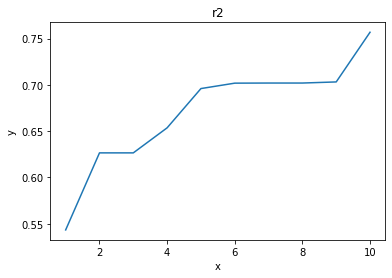

In [9]:
x_data = list(range(1,11))
y_data = models_metrics_r2

plt.plot(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('r2')
plt.show()

$$MSE$$

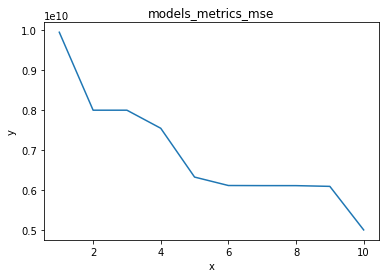

In [10]:
x_data = list(range(1,11))
y_data = models_metrics_mse

plt.plot(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('models_metrics_mse')
plt.show()

**MODELO CON MEJOR PERFORMANCE DEL CONJUNTO DE FORMULAS INICIAL**

La hipotesis que mejor predice a *price* es la hipotesis que incluye todas las variables, esto es:

In [11]:
models_metrics[0][9].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     2366.
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        10:43:58   Log-Likelihood:            -1.0522e+05
No. Observations:                8375   AIC:                         2.105e+05
Df Residuals:                    8363   BIC:                         2.106e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -234.3472   1843.933     -0.127      0.899   -3848.912    3380.217
banos               4.041e+04   1747.872     23.118      0.000     3.7e+04    4.38e+04
m2_edificados       1012.7692     26.265     38.560      0.000     961.283    1064.255
vivienda_social     2.378e+04   2791.717      8.519      0.000    1.83e+04    2.93e+04
garajes             2.249e+04   1269.932     17.711      0.000       2e+04     2.5e+04
gastos_comunes         4.6826      0.162     28.849      0.000       4.364       5.001
dormitorios        -3366.3355   1062.884     -3.167      0.002   -5449.852   -1282.819
m2_del_terreno        46.6301     10.173      4.584      0.000      26.688      66.572
disposición_frente  -408.0718   1785.008     -0.229      0.819   -3907.131    3090.987
estado_rec_exc      8216.2205   1693.957      4.850      0.000    4895.645    1.15e+04
zona_cat_1          -6.82e+04   2879.033    -23.690      0.000   -7.38e+04   -6.26e+04
zona_cat_2          2039.8130   1413.164      1.443      0.149    -730.339    4809.965
zona_cat_3          6.593e+04   1575.850     41.838      0.000    6.28e+04     6.9e+04
==============================================================================
Omnibus:                     2172.157   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12008.005
Skew:                           1.131   Prob(JB):                         0.00
Kurtosis:                       8.412   Cond. No.                     1.02e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.84e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### **MODELO FINAL**

Para esta hipotesis $R^2 = 0.757$ y $MSE = 5.008.336.772$. Sin embargo al ver los *p-values* de las variables en el summary, se ve que algunas variables no son significativas para el modelo.

Para mejorar el performance del modelo se eliminan las variables con *p-value > 0.05* y se corre el modelo de nuevo. Esto implica también eliminar el intercepto

In [12]:
%%time
formula_final = "price ~ banos + m2_edificados + vivienda_social + garajes + gastos_comunes + dormitorios + m2_del_terreno + estado_rec_exc + zona_cat_1 + zona_cat_3 -1"
model_final_regression = sfm.ols(formula = formula_final, data = X_train ).fit()

Wall time: 87.7 ms


In [13]:
model_final_r2  = model_final_regression.rsquared
model_final_ypred = model_final_regression.predict(X_test)
model_mse = mse(X_test.price, model_final_ypred)

In [14]:
print('R2 del modelo final: ', model_final_r2)
print('MSE del modelo final: ', model_mse)

R2 del modelo final:  0.9295038922639968
MSE del modelo final:  5007395412.426304


De los *p-values* se ve como ahora todas las variables son significativas para el modelo.

In [15]:
model_final_regression.pvalues

banos              1.306601e-138
m2_edificados      1.005042e-299
vivienda_social     2.820871e-20
garajes             1.405003e-69
gastos_comunes     8.825067e-179
dormitorios         1.643717e-03
m2_del_terreno      5.777904e-06
estado_rec_exc      5.990010e-07
zona_cat_1          1.079238e-71
zona_cat_3         4.859042e-275
dtype: float64

**SE GUARDA EL MODELO FINAL EN UN .pickle FILE**

In [16]:
with open('model_final_regression.pickle', 'wb') as pickle_file:
    pickle.dump(model_final_regression, pickle_file)

"\nwith open('model_final_regression.pickle', 'wb') as pickle_file:\n    pickle.dump(model_final_regression, pickle_file)\n"